# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [1]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import anomaly_function as func # imports the function
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [12]:
!ls /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5

v20200302


In [4]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [5]:
models_tas = func.read_models(institution_dir, tas_dir)

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [6]:
models_pr = func.read_models(institution_dir, pr_dir)

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [13]:
#models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
#models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)

In [14]:
models_tas.model.equals(models_pr.model)
#models_tas.model==models_pr.model

False

Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [15]:
# area weighting 
models_tasw = models_tas*np.cos(models_tas.lat*(np.pi/180))
models_prw = models_pr*np.cos(models_pr.lat*(np.pi/180))

In [17]:
# select out the northern and sourhern hemisphere regions
models_tas_SH = models_tasw.sel(lat=slice(-90,0))
models_pr_SH = models_prw.sel(lat=slice(-90,0))
models_tas_NH = models_tasw.sel(lat=slice(0,90))
models_pr_NH = models_prw.sel(lat=slice(0,90))

In [18]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [19]:
# this is where I use the land mask and select out the continents
models_tasw_land = models_tasw.where(landmask.data==1, drop=True)
models_prw_land = models_prw.where(landmask.data==1, drop=True)

In [23]:
# here I select the Australia region with a lon,lat box and the Eastern Australia region
models_tas_aus = models_tasw_land.sel(lat=slice(-50,-10), lon=slice(110,160)) 
models_pr_aus = models_prw_land.sel(lat=slice(-50,-10), lon=slice(110,160))
models_tas_EAus = models_tasw_land.sel(lat=slice(-50,-10), lon=slice(140,155))
models_pr_EAus = models_prw_land.sel(lat=slice(-50,-10), lon=slice(140,155)) 

In [21]:
# use functions to calculate the monthly and seasonal anomalies for the globe
# global
# monthly
monthly_anom_tas_glob = func.monthly_anomaly(models_tasw, '1850-01', '19001231')
monthly_anom_pr_glob = func.monthly_anomaly(models_prw, '18500101', '19001231')
# seasonal
seasonal_anom_tas_glob = func.seasonal_anomaly(models_tasw, '18500101', '19001231')
seasonal_anom_pr_glob = func.seasonal_anomaly(models_prw, '18500101', '19001231')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-

In [22]:
# use functions to calculate the monthly and seasonal anomalies for hemispheres
# NH
# monthly
monthly_anom_tas_NH = func.monthly_anomaly(models_tas_NH, '1850-01', '19001231')
monthly_anom_pr_NH = func.monthly_anomaly(models_pr_NH, '18500101', '19001231')
# seasonal
seasonal_anom_tas_NH = func.seasonal_anomaly(models_tas_NH, '18500101', '19001231')
seasonal_anom_pr_NH = func.seasonal_anomaly(models_pr_NH, '18500101', '19001231')

# SH
# monthly
monthly_anom_tas_SH = func.monthly_anomaly(models_tas_SH, '1850-01', '19001231')
monthly_anom_pr_SH = func.monthly_anomaly(models_pr_SH, '18500101', '19001231')
# seasonal
seasonal_anom_tas_SH = func.seasonal_anomaly(models_tas_SH, '18500101', '19001231')
seasonal_anom_pr_SH = func.seasonal_anomaly(models_pr_SH, '18500101', '19001231')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-

In [24]:
# use functions to calculate the monthly and seasonal anomalies for aus and E aus
# Australia 
# monthly
monthly_anom_tas_Aus = func.monthly_anomaly(models_tas_aus, '1850-01', '19001231')
monthly_anom_pr_Aus = func.monthly_anomaly(models_pr_aus, '18500101', '19001231')
# seasonal
seasonal_anom_tas_Aus = func.seasonal_anomaly(models_tas_aus, '18500101', '19001231')
seasonal_anom_pr_Aus = func.seasonal_anomaly(models_pr_aus, '18500101', '19001231')

# East Australia
# monthly
monthly_anom_tas_EA = func.monthly_anomaly(models_tas_EAus, '1850-01', '19001231')
monthly_anom_pr_EA = func.monthly_anomaly(models_pr_EAus, '18500101', '19001231')
# seasonal
seasonal_anom_tas_EA = func.seasonal_anomaly(models_tas_EAus, '18500101', '19001231')
seasonal_anom_pr_EA = func.seasonal_anomaly(models_pr_EAus, '18500101', '19001231')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-

In [25]:
# take the mean in longitutde and latitude for each model
# global
# monthly
mean_mon_tas_Glob = monthly_anom_tas_glob.mean(dim=('lat','lon'))
mean_mon_pr_Glob = monthly_anom_pr_glob.mean(dim=('lat','lon'))
# Seasonal
mean_seasonal_tas_Glob = seasonal_anom_tas_glob.mean(dim=('lat','lon'))
mean_seasonal_pr_Glob = seasonal_anom_pr_glob.mean(dim=('lat','lon'))

In [26]:
# take the mean in longitutde and latitude for each model
# NH
# monthly
mean_mon_tas_NH = monthly_anom_tas_NH.mean(dim=('lat','lon'))
mean_mon_pr_NH = monthly_anom_pr_NH.mean(dim=('lat','lon'))
# Seasonal
mean_seasonal_tas_NH = seasonal_anom_tas_NH.mean(dim=('lat','lon'))
mean_seasonal_pr_NH = seasonal_anom_pr_NH.mean(dim=('lat','lon'))

# SH
# monthly
mean_mon_tas_SH = monthly_anom_tas_SH.mean(dim=('lat','lon'))
mean_mon_pr_SH = monthly_anom_pr_SH.mean(dim=('lat','lon'))
# Seasonal
mean_seasonal_tas_SH = seasonal_anom_tas_SH.mean(dim=('lat','lon'))
mean_seasonal_pr_SH = seasonal_anom_pr_SH.mean(dim=('lat','lon'))

In [27]:
# take the mean in longitutde and latitude for each model
# Australia
# monthly
mean_mon_tas_Aus = monthly_anom_tas_Aus.mean(dim=('lat','lon'))
mean_mon_pr_Aus = monthly_anom_pr_Aus.mean(dim=('lat','lon'))
# Seasonal
mean_seasonal_tas_Aus = seasonal_anom_tas_Aus.mean(dim=('lat','lon'))
mean_seasonal_pr_Aus = seasonal_anom_pr_Aus.mean(dim=('lat','lon'))

# E Aus
# monthly
mean_mon_tas_EA = monthly_anom_tas_EA.mean(dim=('lat','lon'))
mean_mon_pr_EA = monthly_anom_pr_EA.mean(dim=('lat','lon'))
# Seasonal
mean_seasonal_tas_EA = seasonal_anom_tas_EA.mean(dim=('lat','lon'))
mean_seasonal_pr_EA = seasonal_anom_pr_EA.mean(dim=('lat','lon'))

In [28]:
# calculate the multi model mean and take the mean in lat and lon
# global
# monthly
mmm_mon_tas_Glob = mean_mon_tas_Glob.mean(dim='model')
mmm_mon_pr_Glob = mean_mon_pr_Glob.mean(dim='model')
# seasonal
mmm_seasonal_tas_Glob = mean_seasonal_tas_Glob.mean(dim='model')
mmm_seasonal_pr_Glob = mean_seasonal_pr_Glob.mean(dim='model')

In [29]:
# calculate the multi model mean and take the mean in lat and lon
# NH
# monthly
mmm_mon_tas_NH = mean_mon_tas_NH.mean(dim='model')
mmm_mon_pr_NH = mean_mon_pr_NH.mean(dim='model')
# seasonal
mmm_seasonal_tas_NH = mean_seasonal_tas_NH.mean(dim='model')
mmm_seasonal_pr_NH = mean_seasonal_pr_NH.mean(dim='model')

# SH
# monthly
mmm_mon_tas_SH = mean_mon_tas_SH.mean(dim='model')
mmm_mon_pr_SH = mean_mon_pr_SH.mean(dim='model')
# seasonal
mmm_seasonal_tas_SH = mean_seasonal_tas_SH.mean(dim='model')
mmm_seasonal_pr_SH = mean_seasonal_pr_SH.mean(dim='model')

In [30]:
# calculate the multi model mean and take the mean in lat and lon
# Australia
# monthly
mmm_mon_tas_Aus = mean_mon_tas_Aus.mean(dim='model')
mmm_mon_pr_Aus = mean_mon_pr_Aus.mean(dim='model')
# seasonal
mmm_seasonal_tas_Aus = mean_seasonal_tas_Aus.mean(dim='model')
mmm_seasonal_pr_Aus = mean_seasonal_pr_Aus.mean(dim='model')

# E Aus
# monthly
mmm_mon_tas_EA = mean_mon_tas_EA.mean(dim='model')
mmm_mon_pr_EA = mean_mon_pr_EA.mean(dim='model')
# seasonal
mmm_seasonal_tas_EA = mean_seasonal_tas_EA.mean(dim='model')
mmm_seasonal_pr_EA = mean_seasonal_pr_EA.mean(dim='model')

In [41]:
mmm_mon_pr_EA

,Array,Chunk
Bytes,15.84 kB,8 B
Shape,"(1980,)","(1,)"
Count,508287 Tasks,1980 Chunks
Type,float64,numpy.ndarray


In [46]:

per10 = np.max(mean_seasonal_pr_EA.pr)
per90 = np.min(mean_seasonal_pr_EA.pr)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/utils.py:31: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)


(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([-4.99951670e-01, -3.99951670e-01, -2.99951670e-01, -1.99951670e-01,
        -9.99516699e-02,  4.83301010e-05,  1.00048330e-01,  2.00048330e-01,
         3.00048330e-01,  4.00048330e-01,  5.00048330e-01]),
 <BarContainer object of 10 artists>)

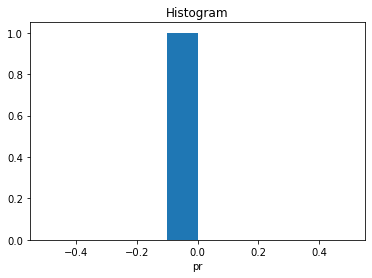

In [49]:
per10.plot()

In [ ]:
min1 = []
max1 = []
for m in mean_seasonal_pr_EA.month:

    m1 = np.max(mmm_mon_pr_EA.pr.sel(month=m))
    m2 = np.min(mmm_mon_pr_EA.pr.sel(month=m))

    min1.append(m2)
    max1.append(m1)

max2 = xr.concat(max1, dim='month')
min2 = xr.concat(min1, dim = 'month')

In [ ]:
per10 = []
per90 = []
for m in mean_seasonal_pr_EA.month:

    p10 = np.percentile(mmm_mon_pr_EA.pr.sel(month=m), 10)
    p90 = np.percentile(mmm_mon_pr_EA.pr.sel(month=m), 90)

    per10.append(p10)
    per90.append(p90)

perc = xr.concat(per10, dim='month')
perc2 = xr.concat(per90, dim = 'month')

In [45]:
per10 = []
per90 = []
for y in mean_seasonal_pr_EA.seasonyear:
    for s in mean_seasonal_pr_EA.season:
        p10 = np.percentile(mean_seasonal_pr_EA.pr.sel(seasonyear=y, season = s), 10)
        p90 = np.percentile(mean_seasonal_pr_EA.pr.sel(seasonyear=y, season = s), 90)
    
        per10.append(p10)
        per90.append(p90)

perc = xr.concat(per10, dim='seasonyear')
perc2 = xr.concat(per90, dim = 'seasonyear')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

KeyboardInterrupt: 

In [40]:
per10 = []
per90 = []
for t in mean_seasonal_pr_EA.seasonyear:
    p10 = np.percentile(mean_seasonal_pr_EA.pr.sel(seasonyear=t), 10)
    p90 = np.percentile(mean_seasonal_pr_EA.pr.sel(seasonyear=t), 90)
    
    per10.append(p10)
    per90.append(p90)

perc = xr.concat(per10, dim='time')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

KeyboardInterrupt: 

In [51]:
mean_mon_pr_EA

,Array,Chunk
Bytes,633.60 kB,8 B
Shape,"(40, 1980)","(1, 1)"
Count,401367 Tasks,79200 Chunks
Type,float64,numpy.ndarray


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

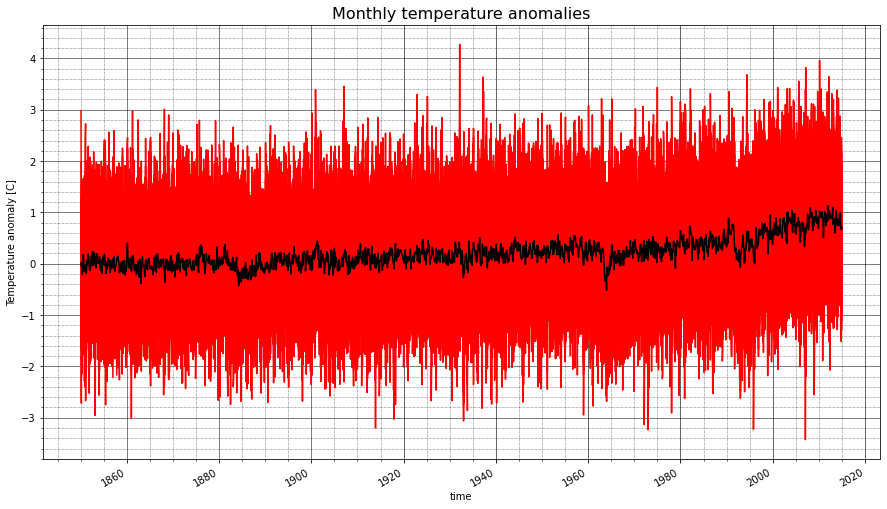

In [61]:
fig, ax = plt.subplots() # make a figure

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon_pr_EA.model:
    mean_mon_tas_EA.tas.sel(model=m).plot(color = 'red', ax=ax) # plot the anomalies

# plot the multi_model mean
mmm_mon_tas_EA.tas.plot(color = 'k', ax=ax) 
plt.title('Monthly temperature anomalies', fontsize=16)
plt.ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

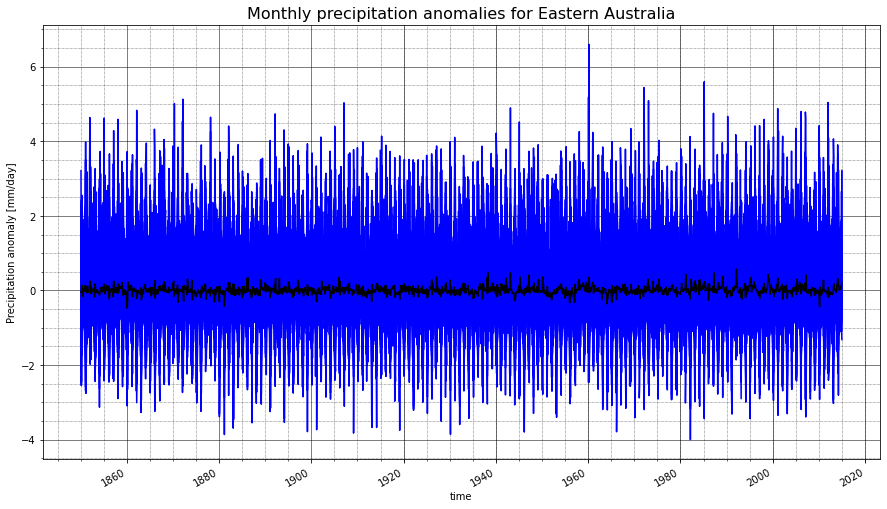

In [62]:
fig, ax = plt.subplots() # make a figure

precip = mean_mon_pr_EA.pr*86400
mean = mmm_mon_pr_Aus.pr*86400

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon_pr_EA.model:
    precip.sel(model=m).plot(color = 'blue', ax=ax) # plot the anomalies

# plot the multi_model mean
mean.plot(color = 'k', ax=ax) 
plt.title('Monthly precipitation anomalies for Eastern Australia', fontsize=16)
plt.ylabel('Precipitation anomaly [mm/day]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

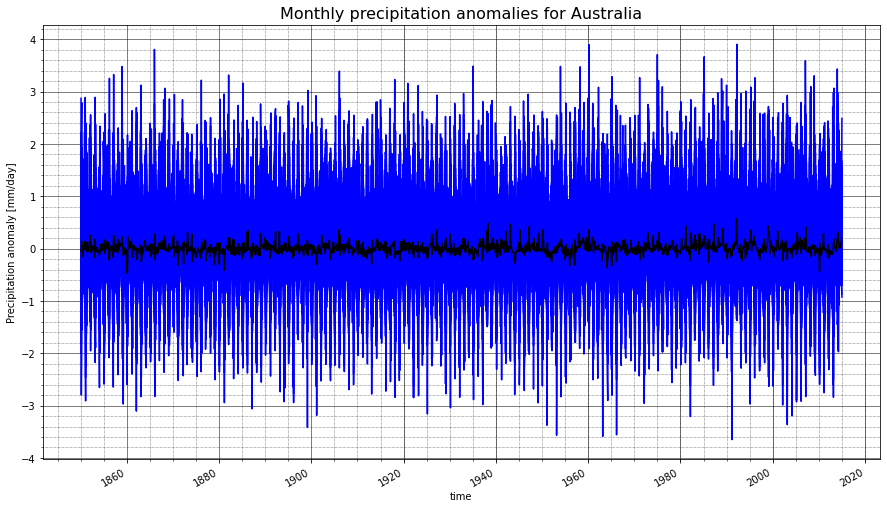

In [63]:
fig, ax = plt.subplots() # make a figure

precip = mean_mon_pr_Aus.pr*86400
mean = mmm_mon_pr_Aus.pr*86400

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon_pr_Aus.model:
    precip.sel(model=m).plot(color = 'blue', ax=ax) # plot the anomalies

# plot the multi_model mean
mean.plot(color = 'k', ax=ax) 
plt.title('Monthly precipitation anomalies for Australia', fontsize=16)
plt.ylabel('Precipitation anomaly [mm/day]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

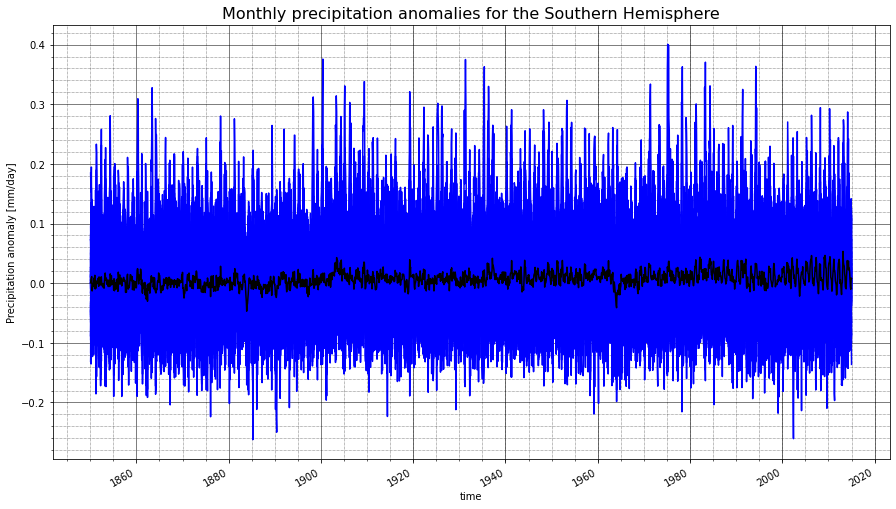

In [65]:
fig, ax = plt.subplots() # make a figure

precip = mean_mon_pr_SH.pr*86400
mean = mmm_mon_pr_SH.pr*86400

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon_pr_SH.model:
    precip.sel(model=m).plot(color = 'blue', ax=ax) # plot the anomalies

# plot the multi_model mean
mean.plot(color = 'k', ax=ax) 
plt.title('Monthly precipitation anomalies for the Southern Hemisphere', fontsize=16)
plt.ylabel('Precipitation anomaly [mm/day]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

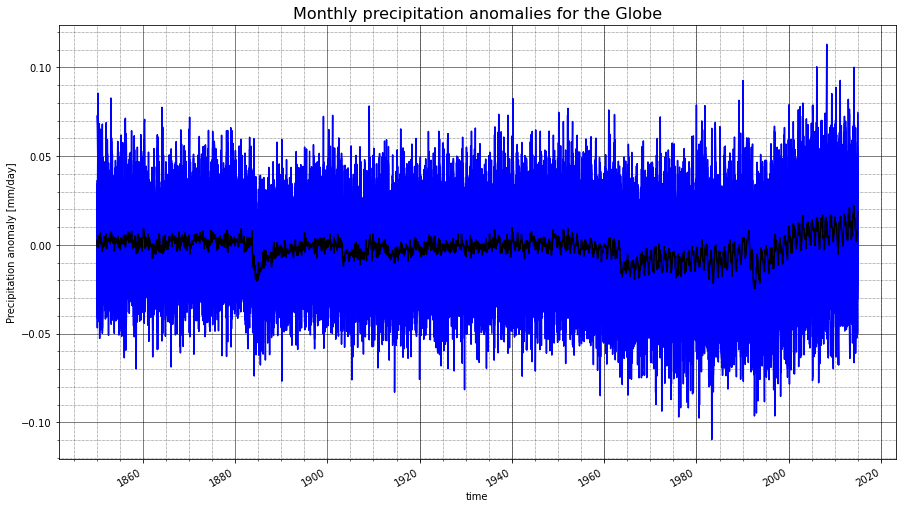

In [66]:
fig, ax = plt.subplots() # make a figure

precip = mean_mon_pr_Glob.pr*86400
mean = mmm_mon_pr_Glob.pr*86400

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon_pr_Glob.model:
    precip.sel(model=m).plot(color = 'blue', ax=ax) # plot the anomalies

# plot the multi_model mean
mean.plot(color = 'k', ax=ax) 
plt.title('Monthly precipitation anomalies for the Globe', fontsize=16)
plt.ylabel('Precipitation anomaly [mm/day]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

NameError: name 'mean_mon' is not defined

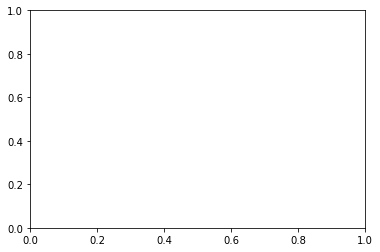

In [24]:
#zoom in on one year
fig, ax = plt.subplots() # make a figure

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon.model:
    mean_mon.sel(model=m).sel(time=slice('18780101','18931231')).plot(color = 'red', ax=ax) #plot the anomalies

# plot the multi_model mean
mmm_mon.sel(time=slice('18780101','18931231')).plot(color = 'k', ax=ax) 
plt.title('Monthly temperature anomalies', fontsize=16)
plt.ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title

ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

In [25]:
# select the anomaly for each season

anom_djf = mean_seasonal.sel(season = 'DJF')
anom_mam = mean_seasonal.sel(season = 'MAM')
anom_jja = mean_seasonal.sel(season = 'JJA')
anom_son = mean_seasonal.sel(season = 'SON')

NameError: name 'mean_seasonal' is not defined

In [19]:
mmm_djf = mmm_seasonal.sel(season = 'DJF')
mmm_mam = mmm_seasonal.sel(season = 'MAM')
mmm_jja = mmm_seasonal.sel(season = 'JJA')
mmm_son = mmm_seasonal.sel(season = 'SON')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


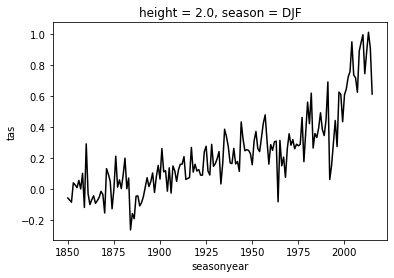

In [20]:
f, ax = plt.subplots()
mmm_djf.tas.plot(color = 'k', ax=ax) 

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

Text(0.5, 0.98, 'Seasonal temperature anomalies')

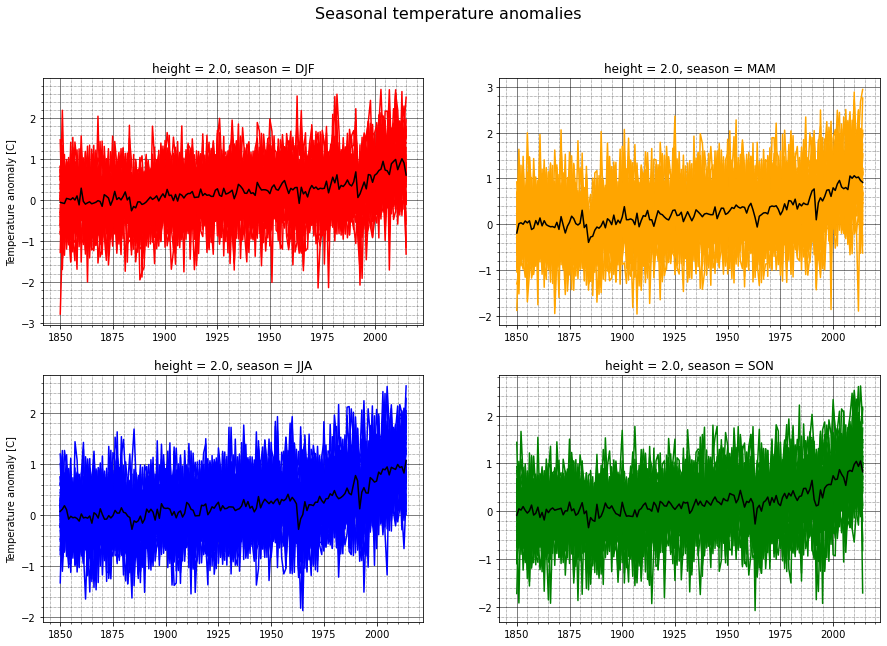

In [21]:
# seasonal temperature anomalies from 1850-2014 using a climatology from 1850-1900

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# loop over all the models and plot the monthly anomalies on one graph
for m in mean_mon.model:
    anom_djf.sel(model=m).tas.plot(ax=ax, color ='red') # plot the anomalies
    anom_mam.sel(model=m).tas.plot(ax=ax2, color='orange')
    anom_jja.sel(model=m).tas.plot(ax=ax3, color='blue')
    anom_son.sel(model=m).tas.plot(ax=ax4, color='green')

    
# plot the multimodel mean
mmm_djf.tas.plot(color = 'k', ax=ax) 
mmm_mam.tas.plot(color = 'k', ax=ax2) 
mmm_jja.tas.plot(color = 'k', ax=ax3) 
mmm_son.tas.plot(color = 'k', ax=ax4) 
    
#subplot 1 DJF
# add gridlines
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax.set(xlabel=None)
ax.set(ylabel='Temperature anomaly [C]')
# set axis limits
#ax.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 2 MAM
# add gridlines
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax2.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax2.minorticks_on() # need this line in order to get the minor grid lines 
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax2.set(xlabel=None)
ax2.set(ylabel=None)
# set axis limits
#ax2.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 3 JJA
# add gridlines
ax3.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax3.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax3.minorticks_on() # need this line in order to get the minor grid lines 
ax3.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax3.set(xlabel=None)
ax3.set(ylabel='Temperature anomaly [C]')
# set axis limits
#ax3.set_ylim(ymin = -0.7, ymax = 1.7)

# subplot 4 SON
# add gridlines
ax4.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax4.set_axisbelow(True) # Don't allow the axis to be on top of your data, don't necessarily need this line
ax4.minorticks_on() # need this line in order to get the minor grid lines 
ax4.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# change axis labels
ax4.set(ylabel=None)
ax4.set(xlabel=None)
# set axis limits
#ax4.set_ylim(ymin = -0.7, ymax = 1.7)

f.suptitle('Seasonal temperature anomalies', fontsize=16)
